In [3]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import tqdm
from urllib.parse import quote
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
chromedriver = 'chromedriver.exe'
driver = webdriver.Chrome(chromedriver)

In [15]:
base_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'
driver.get(base_url)
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [16]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
jusik = soup.select('tbody > tr')
len(jusik)

17

In [17]:
df = pd.read_html(str(soup.find("table")), header=0)[0]
df = df.dropna()
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2022.05.06,66500.0,1400.0,67000.0,67100.0,66500.0,14250310.0
2,2022.05.04,67900.0,400.0,68000.0,68400.0,67500.0,11505248.0
3,2022.05.03,67500.0,200.0,67400.0,68400.0,67300.0,14168875.0
4,2022.05.02,67300.0,100.0,66600.0,67600.0,66500.0,14106184.0
5,2022.04.29,67400.0,2600.0,65100.0,67600.0,65000.0,26190390.0
9,2022.04.28,64800.0,200.0,65400.0,65500.0,64500.0,16895527.0
10,2022.04.27,65000.0,1100.0,65400.0,65500.0,64900.0,18122084.0
11,2022.04.26,66100.0,200.0,66400.0,66700.0,66100.0,12946923.0
12,2022.04.25,66300.0,700.0,66500.0,66700.0,66300.0,11016474.0
13,2022.04.22,67000.0,700.0,67200.0,67300.0,66700.0,11791478.0


In [18]:
driver.close()

In [19]:
df = df.astype({'종가':'int'})
df = df.astype({'전일비':'int'})
df = df.astype({'시가':'int'})
df = df.astype({'고가':'int'})
df = df.astype({'저가':'int'})
df = df.astype({'거래량':'int'})
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2022.05.06,66500,1400,67000,67100,66500,14250310
2,2022.05.04,67900,400,68000,68400,67500,11505248
3,2022.05.03,67500,200,67400,68400,67300,14168875
4,2022.05.02,67300,100,66600,67600,66500,14106184
5,2022.04.29,67400,2600,65100,67600,65000,26190390
9,2022.04.28,64800,200,65400,65500,64500,16895527
10,2022.04.27,65000,1100,65400,65500,64900,18122084
11,2022.04.26,66100,200,66400,66700,66100,12946923
12,2022.04.25,66300,700,66500,66700,66300,11016474
13,2022.04.22,67000,700,67200,67300,66700,11791478


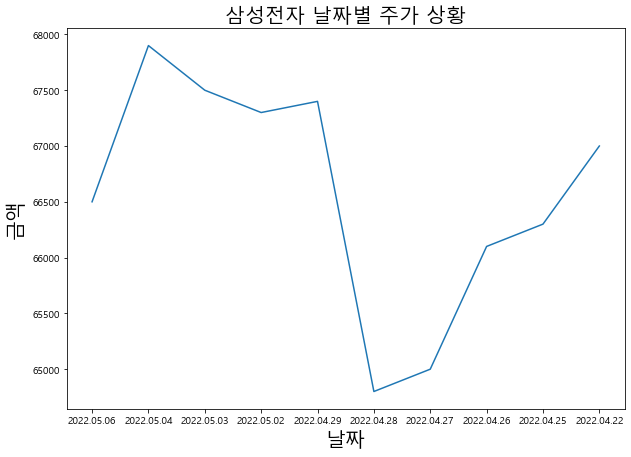

In [10]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
fig = plt.figure(figsize=(15,10))
plt.plot(df['날짜'],df['종가'])
plt.title('삼성전자 날짜별 주가 상황',fontsize=15)
plt.xlabel('날짜', fontsize=15)
plt.ylabel('금액',rotation=80, fontsize=15)
plt.show()

In [20]:
df.to_csv('삼성전자_날짜별_주가.csv', index=False)